In [89]:
import nltk
import re
import pandas as pd
from IPython.display import clear_output
from collections import defaultdict
from string import punctuation
import matplotlib.pyplot as plt
import numpy as np

#stopwords em portugues
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese') + list(punctuation) + ['“','”'])

#funçao pra limpeza de texto
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False)

In [7]:
#funçao pra leitura de dados e criaçao de dataframe
def json_to_dataframe(nome_json, colunas, chunk=30):
    dados = pd.read_json(nome_json, convert_dates = False, lines = True, chunksize = chunk)    
    
    for df_tweets_retweets in dados:
        yield df_tweets_retweets[colunas]

In [8]:
#funçao pra limpar texto e retirar stopwords
def tokenizar_texto(texto_tweet):
    texto_tokenizado = tweet_tokenizer.tokenize(texto_tweet)

    if texto_tokenizado[0] == "rt" and texto_tokenizado[1] == ":":
        del texto_tokenizado[0]
    
    palavras_sem_stopwords = [palavra for palavra in texto_tokenizado if palavra not in stopwords] 
    return palavras_sem_stopwords

In [9]:
#funçao pra criar dicionario com a data e quantidade dos tweets por usuario
def contagem_usuarios_data(gerador,destino):
    
    dict_datas_usuarios = defaultdict(dict)            
    
    for dataframe in gerador:        
        for linha in dataframe.values:            
            usuario = linha[0]['screen_name']

            data = linha[1]['$date'][:10]
            if data not in dict_datas_usuarios or usuario not in dict_datas_usuarios[data]:
                dict_datas_usuarios[data][usuario] = 0
            dict_datas_usuarios[data][usuario] += 1
            clear_output()
            
    escrever_arq_csv(dict_datas_usuarios,destino)

In [10]:
#funçao pra escrever os resultados no arquivo csv
def escrever_arq_csv(dict_datas_usuarios,destino):
    with open(destino, 'w', encoding="utf-8") as f:
        f.write("Datas;Usuários;Tweets\n")

        for key in dict_datas_usuarios.keys():
            for user in dict_datas_usuarios[key].keys():
                f.write("%s;%s;%s\n"%(key, user, dict_datas_usuarios[key][user]))
            
    print('A contagem de tweets por usuario por data foi salva com sucesso no arquivo')

In [11]:
#execuçao do codigo
#1k
gerador = json_to_dataframe('1k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_1k.csv')

A contagem de tweets por usuario por data foi salva com sucesso no arquivo


In [86]:
cont_usuarios_data = pd.read_csv('cont_usuarios_data_1k.csv', sep = ";")
sum(cont_usuarios_data.Tweets)

1000

In [84]:
cont_usuarios_data.Usuários.size

949

In [83]:
cont_usuarios_data.head()
cont_usuarios_data.set_index('Datas', inplace=True)

In [92]:
cont_usuarios_data.groupby('Datas').agg({'numusuarios':len})

SpecificationError: nested renamer is not supported

[Text(0, 0, 'Naaclara0'),
 Text(0, 0, 'arcanjoOficial'),
 Text(0, 0, 'R_Ramba09'),
 Text(0, 0, 'RhysandAaron'),
 Text(0, 0, 'capartensucette'),
 Text(0, 0, 'hellenmgf'),
 Text(0, 0, 'Stupid_Pansder'),
 Text(0, 0, 'ItsCotovia'),
 Text(0, 0, 'marciov01210938'),
 Text(0, 0, 'mavdarctic'),
 Text(0, 0, 'selecoesbrasil'),
 Text(0, 0, 'alrenators'),
 Text(0, 0, 'chanel_n515'),
 Text(0, 0, 'Vincenzo7D'),
 Text(0, 0, 'AdsCria'),
 Text(0, 0, 'tbnaomateijoana'),
 Text(0, 0, 'jordao_v18'),
 Text(0, 0, '_millyds'),
 Text(0, 0, 'mmarinhomkt'),
 Text(0, 0, 'richtozz'),
 Text(0, 0, 'farias_leonidas'),
 Text(0, 0, 'ptribeirao'),
 Text(0, 0, 'PocMenLgbt'),
 Text(0, 0, 'as_dobr'),
 Text(0, 0, 'domingosdamota'),
 Text(0, 0, 'ravenagarai')]

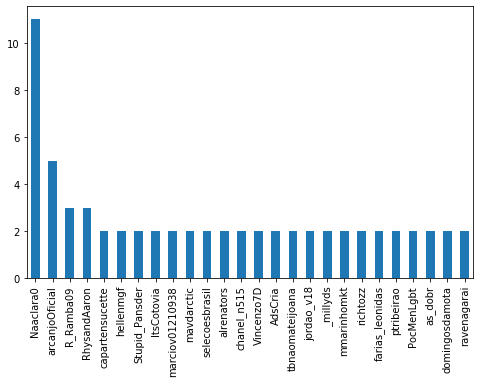

In [97]:
#faz gráfico tweets/usuário
cont_usuarios_data = pd.read_csv('cont_usuarios_data_1k.csv', sep = ";")
cont_usuarios_data = cont_usuarios_data.sort_values(by = 'Tweets',  ascending = False)[:26]

ax = cont_usuarios_data['Tweets'].plot(figsize = (8,5), kind='bar')
ax.set_xticklabels(data ["Usuários"])

#plt.savefig('tweets_usuarios_1k.jpg', format='jpg', transparent=True, dpi=300, bbox_inches='tight')

[Text(0, 0, 'Naaclara0'),
 Text(0, 0, 'arcanjoOficial'),
 Text(0, 0, 'R_Ramba09'),
 Text(0, 0, 'RhysandAaron'),
 Text(0, 0, 'capartensucette'),
 Text(0, 0, 'hellenmgf'),
 Text(0, 0, 'Stupid_Pansder'),
 Text(0, 0, 'ItsCotovia'),
 Text(0, 0, 'marciov01210938'),
 Text(0, 0, 'mavdarctic'),
 Text(0, 0, 'selecoesbrasil'),
 Text(0, 0, 'alrenators'),
 Text(0, 0, 'chanel_n515'),
 Text(0, 0, 'Vincenzo7D'),
 Text(0, 0, 'AdsCria'),
 Text(0, 0, 'tbnaomateijoana'),
 Text(0, 0, 'jordao_v18'),
 Text(0, 0, '_millyds'),
 Text(0, 0, 'mmarinhomkt'),
 Text(0, 0, 'richtozz'),
 Text(0, 0, 'farias_leonidas'),
 Text(0, 0, 'ptribeirao'),
 Text(0, 0, 'PocMenLgbt'),
 Text(0, 0, 'as_dobr'),
 Text(0, 0, 'domingosdamota'),
 Text(0, 0, 'ravenagarai')]

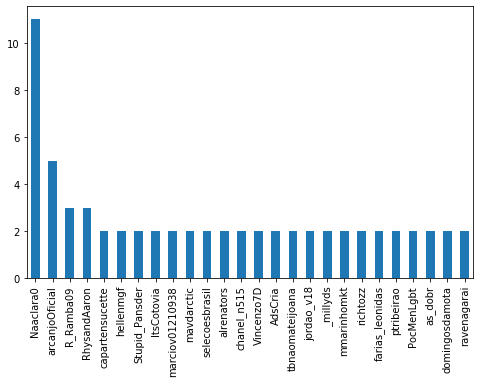

In [98]:
ax = cont_usuarios_data['Tweets'].plot(figsize = (8,5), kind='bar')
ax.set_xticklabels(data ["Usuários"])

In [ ]:
#5k
gerador = json_to_dataframe('5k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_5k.csv')

In [ ]:
#100k
gerador = json_to_dataframe('100k_origin.json',["user","created_at"])

contagem_usuarios_data(gerador,'cont_usuarios_data_100k.csv')